REGRESSION

In [65]:
import pandas as pd
import numpy as np

In [66]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT_DS/CSV/cleaned2_Startup_funding.csv')

In [67]:
df=data.copy()

LABELING CATEGORICAL DATA  FOR TRAINING

In [68]:
df['Industry_Vertical'].unique()

array(['EdTech', 'FinTech', 'Technology', 'Hospitality', 'FoodTech',
       'ECommerce', 'B2B', 'Consumer Goods', 'SaaS', 'Retail', 'Services',
       'Healthcare', 'Artificial Intelligence', 'Gaming',
       'Consumer Internet', 'Logistics', 'Real Estate', 'CleanTech',
       'Media', 'Automation', 'Others', 'Fashion', 'Transport', 'Beauty',
       'Auto', 'Marketplace', 'Analytics', 'Home Decor',
       'Food & Beverage'], dtype=object)

In [69]:
industry_encoding = {
    'EdTech': 0,
    'FinTech': 1,
    'Technology': 2,
    'Hospitality': 3,
    'FoodTech': 4,
    'ECommerce': 5,
    'B2B': 6,
    'Consumer Goods': 7,
    'SaaS': 8,
    'Retail': 9,
    'Services': 10,
    'Healthcare': 11,
    'Artificial Intelligence': 12,
    'Gaming': 13,
    'Consumer Internet': 14,
    'Logistics': 15,
    'Real Estate': 16,
    'CleanTech': 17,
    'Media': 18,
    'Automation': 19,
    'Others': 20,
    'Fashion': 21,
    'Transport': 22,
    'Beauty': 23,
    'Auto': 24,
    'Marketplace': 25,
    'Analytics': 26,
    'Home Decor': 27,
    'Food & Beverage': 28
}
df['Industry_Vertical_encoded'] = df['Industry_Vertical'].map(industry_encoding)


In [70]:
df['City_Location'].unique()

array(['Bangalore', 'New Delhi', 'Mumbai', 'Gurgaon', 'Chennai', 'Pune',
       'Noida', 'Unknown', 'Faridabad', 'Hyderabad', 'Tulangan', 'Bhopal',
       'Jaipur', 'Amritsar', 'Nagpur', 'Indore', 'Rourkela', 'Ahmedabad',
       'Bhubaneswar', 'Srinagar', 'Chandigarh', 'Coimbatore', 'Kolkata',
       'Udaipur', 'Surat', 'Kochi', 'Udupi', 'Karur', 'Gwalior', 'Goa',
       'Gaya', 'Vadodara', 'Trivandrum', 'Panaji', 'Agra', 'Hubli',
       'Kozhikode', 'Siliguri', 'Lucknow', 'Kanpur', 'Varanasi',
       'Jodhpur', 'Belgaum'], dtype=object)

In [71]:
city_encoding = {
    'Bangalore': 0,
    'New Delhi': 1,
    'Mumbai': 2,
    'Gurgaon': 3,
    'Chennai': 4,
    'Pune': 5,
    'Noida': 6,
    'Unknown': 7,
    'Faridabad': 8,
    'Hyderabad': 9,
    'Tulangan': 10,
    'Bhopal': 11,
    'Jaipur': 12,
    'Amritsar': 13,
    'Nagpur': 14,
    'Indore': 15,
    'Rourkela': 16,
    'Ahmedabad': 17,
    'Bhubaneswar': 18,
    'Srinagar': 19,
    'Chandigarh': 20,
    'Coimbatore': 21,
    'Kolkata': 22,
    'Udaipur': 23,
    'Surat': 24,
    'Kochi': 25,
    'Udupi': 26,
    'Karur': 27,
    'Gwalior': 28,
    'Goa': 29,
    'Gaya': 30,
    'Vadodara': 31,
    'Trivandrum': 32,
    'Panaji': 33,
    'Agra': 34,
    'Hubli': 35,
    'Kozhikode': 36,
    'Siliguri': 37,
    'Lucknow': 38,
    'Kanpur': 39,
    'Varanasi': 40,
    'Jodhpur': 41,
    'Belgaum': 42
}
df['City_Location_encoded'] = df['City_Location'].map(city_encoding)


In [72]:
df['Investment_Type'].unique()

array(['Private Equity', 'Pre-Series A', 'Seed Funding', 'Series C',
       'Series B', 'Series A', 'Series E', 'Series D', 'Series F',
       'Series H', 'Series G', 'Other', 'Debt Funding', 'Angel Funding',
       'Venture Round', 'Series J'], dtype=object)

In [73]:
investment_type_encoding = {
    'Private Equity': 0,
    'Pre-Series A': 1,
    'Seed Funding': 2,
    'Series C': 3,
    'Series B': 4,
    'Series A': 5,
    'Series E': 6,
    'Series D': 7,
    'Series F': 8,
    'Series H': 9,
    'Series G': 10,
    'Other': 11,
    'Debt Funding': 12,
    'Angel Funding': 13,
    'Venture Round': 14,
    'Series J': 15
}
df['Investment_Type_encoded'] = df['Investment_Type'].map(investment_type_encoding)


In [74]:
df.select_dtypes(include=np.number)

,Amount_USD,Year,investor_count,Industry_Vertical_encoded,City_Location_encoded,Investment_Type_encoded
0,200000000.0,2020,1,0,0,0
1,3000000.0,2020,1,1,1,1
2,1800000.0,2020,1,2,2,2
3,8048394.0,2020,1,2,3,3
4,18358860.0,2020,1,2,0,4
...,...,...,...,...,...,...
2868,25000000.0,2015,1,2,3,0
2869,1529113.0,2015,1,2,4,2
2870,25795550.0,2015,2,27,0,0
2871,10000000.0,2015,1,2,0,0


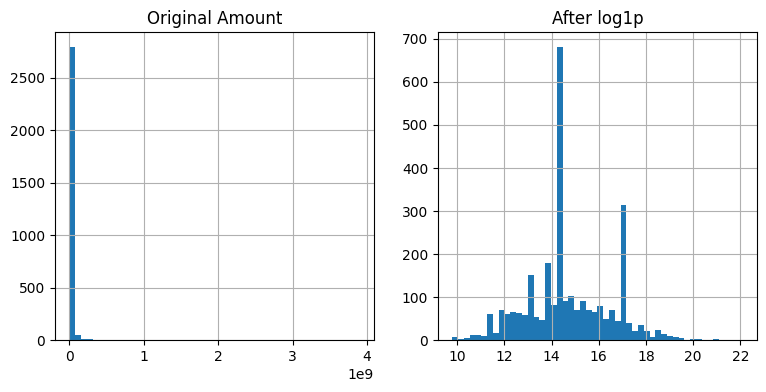

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
df['Amount_USD'].hist(bins=50)
plt.title('Original Amount')

plt.subplot(1, 3, 2)
np.log1p(df['Amount_USD']).hist(bins=50)
plt.title('After log1p')

plt.show()


- Startup funding data is right-skewed — most companies raise small amounts, but a few raise huge sums.

- Applying log1p() compresses large values, making the distribution more balanced and normal.


---



In [76]:
df['Amount_USD'] = np.log1p(df['Amount_USD'])

REMOVING OUTLIERS

In [77]:
data=df['investor_count']

q1=np.percentile(data,25)
q3=np.percentile(data,75)
IQR=q3-q1
print(f'IQR:{IQR}')
lowwiskers=q1-1.5*IQR
highwiskers=q3+1.5*IQR
print(f'lowwiskers:{lowwiskers}')
print(f'highwiskers:{highwiskers}')
no_outliers=df[(df['investor_count']>=lowwiskers) & (df['investor_count']<=highwiskers)]

no_outliers

IQR:1.0
lowwiskers:-0.5
highwiskers:3.5


,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count,Industry_Vertical_encoded,City_Location_encoded,Investment_Type_encoded
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,19.113828,No Remark,2020,High,1,0,0,0
1,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,14.914123,No Remark,2020,Medium,1,1,1,1
2,2020-01-02,Fashor,Technology,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,14.403298,No Remark,2020,Medium,1,2,2,2
3,2020-01-13,Shuttl,Technology,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,15.900983,No Remark,2020,Medium,1,2,3,3
4,2020-01-09,Mamaearth,Technology,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,16.725623,No Remark,2020,High,1,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2015-04-11,Zomato,Technology,Unknown,Gurgaon,Info Edge (India),Private Equity,17.034386,Late Stage,2015,High,1,2,3,0
2869,2015-04-10,iMMi Life,Technology,Unknown,Chennai,Unitus Seed Fund,Seed Funding,14.240199,No Remark,2015,Medium,1,2,4,2
2870,2015-04-28,Urban Ladder,Home Decor,Unknown,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,17.065713,Series D,2015,High,2,27,0,0
2871,2015-04-28,Babajobs,Technology,Unknown,Bangalore,SEEK Ltd & affiliates,Private Equity,16.118096,Series B,2015,Medium,1,2,0,0


In [78]:
# Amount_USD outlier removal

data=no_outliers['Amount_USD']

q1=np.percentile(data,25)
q3=np.percentile(data,75)
IQR=q3-q1
print(f'IQR:{IQR}')
lowwiskers=q1-1.5*IQR
highwiskers=q3+1.5*IQR
print(f'lowwiskers:{lowwiskers}')
print(f'highwiskers:{highwiskers}')
no_outliers_amount = no_outliers[
    (no_outliers['Amount_USD'] >= lowwiskers) &
    (no_outliers['Amount_USD'] <= highwiskers)
]


IQR:2.3025841929945408
lowwiskers:10.361635268471963
highwiskers:19.571972040450127


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 1. Prepare features and target
x = no_outliers_amount[['Industry_Vertical_encoded', 'City_Location_encoded', 'Investment_Type_encoded', 'investor_count', 'Year']]
y = no_outliers_amount['Amount_USD']

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor()
}

# 4. Train and evaluate each model
print("Model Performance (R² Score):")
print("----------------------------------")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:20s}: R² = {r2:.4f}")


Model Performance (R² Score):
----------------------------------
Linear Regression   : R² = 0.1599
Decision Tree       : R² = 0.3196
Random Forest       : R² = 0.4007
Gradient Boosting   : R² = 0.5047
KNN Regressor       : R² = 0.3824


In [80]:
import numpy as np

# Replace with your best trained model
best_model = GradientBoostingRegressor()
best_model.fit(x_train, y_train)

new_input = np.array([[5, 3, 2, 4, 2021]])

# Make prediction
predicted_funding = best_model.predict(new_input)
predicted_amount = np.expm1(predicted_funding)



print("Predicted Funding Amount (USD):", predicted_funding)
print(f"Predicted Funding Amount (USD): ₹{predicted_amount[0]:,.2f}")

Predicted Funding Amount (USD): [15.5973113]
Predicted Funding Amount (USD): ₹5,940,543.16


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
